##Supervised Learning: Linear Regression

We'll be going over how to use the scikit-learn regression model, as well as how to train the regressor using the fit() method, and how to predict new labels using the predict() method. We'll be analyzing a data set consisting of house prices in Boston. We'll start off with a single variable linear regression using numpy and then move on to using scikit learn. We'll do an overview of the mathematics behind the method we're using, but mostly we'll dive deeper into pratical "hands-on" coding lessons.

In this section we will be working through linear regression with the following steps:

Step 1: Getting and setting up the data.

Step 2: Visualizing current data.

Step 3: The mathematics behind the Least Squares Method.

Step 4: Using Numpy for a Univariate Linear Regression.

Step 5: Getting the error.

Step 6: Using scikit learn to implement a multivariate regression.

Step 7: Using Training and Validation.  

Step 8: Predicting Prices

Step 9 : Residual Plots

###Step 1: Getting and setting up the data.

We'll start by looking a an example of a dataset from scikit-learn. First we'll import our usual data analysis imports, then sklearn's built-in boston dataset.

In [2]:
# Standard imports

import numpy as np
import pandas as pd
from pandas import DataFrame, Series

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# scikit learn
import sklearn
from sklearn.datasets import load_boston

In [3]:
# Load the housing data sets
boston = load_boston()

print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

###Step 2: Visualizing current data

You should always try to do a quick visualization fo the data you have. Let's go ahead an make a histogram of the prices.

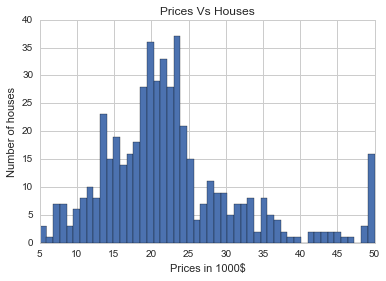

In [29]:
# histogram of prices

plt.hist(boston.target, bins=50)

plt.xlabel('Prices in 1000$')
plt.ylabel('Number of houses')
plt.title('Prices Vs Houses')

plt.savefig('house_vs_price.png')

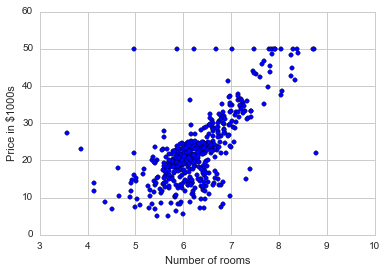

In [7]:
plt.scatter(boston.data[:,5], boston.target)

#label
plt.ylabel('Price in $1000s')
plt.xlabel('Number of rooms')

Now we can make out a slight trend that price increases along with the number of rooms in that house, which intuitively makes sense! Now let's use scikit learn to see if we can fit the data linearly.

Let's try to do the following:

1.) Use pandas to transform the boston dataset into a DataFrame: 

2.) Then use seaborn to perform an lmplot on that DataFrame to reproduce the scatter plot with a linear fit line.

In [8]:
# converting into dataFrame

boston_df = DataFrame(boston.data)
boston_df.columns=  boston.feature_names

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [9]:
# Creating a price column in dataFrame

boston_df['PRICE'] = boston.target

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Now, you might be reminded of the seaborn lmplot function we used during the visualization lectures. You could use it here to do a linear fit automatically!

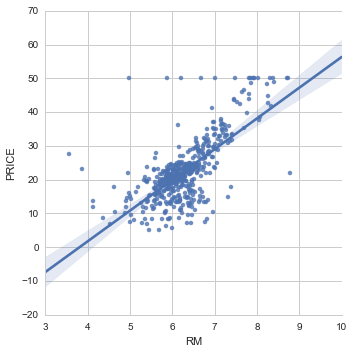

In [10]:
# linear regression plot

sns.lmplot('RM', 'PRICE', data=boston_df)

###Step 3: The mathematics behind the Least Squares Method.

In this we'll use the least squares method as the way to estimate the coefficients. Here's a quick breakdown of how this method works mathematically:

Take a quick look at the plot we created above using seaborn. Now consider each point, and know that they each have a coordinate in the form (X,Y). Now draw an imaginary line between each point and our current "best-fit" line. We'll call the distanace between each point and our current best-fit line, D. To get a quick image of what we're currently trying to visualize, take a look at the picture below:

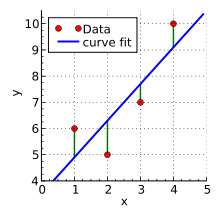

In [11]:

# Quick display of image form wikipedia
from IPython.display import Image
url = 'http://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/220px-Linear_least_squares_example2.svg.png'
Image(url)

###Step 4: Using Numpy for a Univariate Linear Regression

Numpy has a built in Least Square Method in its linear algebra library. We'll use this first for our Univariate regression and then move on to scikit learn for out Multi variate regression.

We will start by setting up the X and Y arrays for numpy to take in. An important note for the X array: Numpy expects a two-dimensional array, the first dimension is the different example values, and the second dimension is the attribute number. In this case we have our value as the mean number of rooms per house, and this is a single attribute so the second dimension of the array is just 1. So we'll need to create a (506,1) shape array. There are a few ways to do this, but an easy way to do this is by using numpy's built-in vertical stack tool, vstack.

In [12]:
# Numpy linear algebra needs to have data in the form data and parameters

x = boston_df.RM
#print x.shape

x = np.vstack(boston_df.RM)
#print x.shape

y = boston_df.PRICE



Now that we have our X and Y, let's go ahead and use numpy to create the single variable linear regression.

We know that a line has the equation:

y=mx+b

which we can rewrite using matrices:

y=Ap

where:
A=[x 1]
and
p=[m b]

This is the same as the first equation if you carry out the linear algebra. So we'll start by creating the A matrix using numpy. We'll do this by creating a matrix in the form [X 1], so we'll call every value in our original X using a list comprehension and then set up an array in the form [X 1]

In [13]:
# using list comprehension
x = np.array([[value, 1] for value in x])

In [14]:
# Now get out m and b values for our best fit line

m, b = np.linalg.lstsq(x, y)[0]

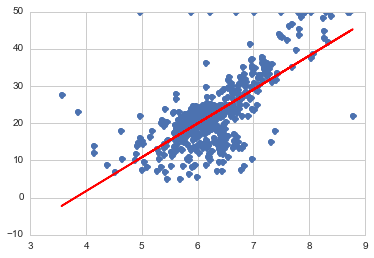

In [28]:
# Plotting the same lm plot that we plotted earlier using seaborn

plt.plot(boston_df.RM,boston_df.PRICE ,'o')

# plotting line
X = boston_df.RM

plt.plot(X,m*X + b,'red', label = 'Best Fit')
plt.savefig('bestfit.png')

###Step 5: Getting the error

We've just completed a single variable regression using the least squares method with Python! Let's see if we can find the error in our fitted [check the link](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html). Checking out the documentation here, we see that the resulting array has the total squared error. For each element, it checks the the difference between the line and the true value (our original D value), squares it, and returns the sum of all these. This was the summed D^2 value we discussed earlier.

It's probably easier to understand the root mean squared error, which is similar to the standard deviation. In this case, to find the root mean square error we divide by the number of elements and then take the square root. There is also an issue of bias and an unbiased regression, but we'll delve into those topics later.

For now let's see how we can get the root mean squared error of the line we just fitted.

In [16]:
"""
Dependent variable always on y axis and independent variable on x axis while plotting.
"""

result = np.linalg.lstsq(x,y)[1]

# Total error
total_error = np.sqrt(result/len(x))

print "The root mean square error is: {}" .format(float(total_error))

The root mean square error is: 6.60307138922


Since the root mean square error (RMSE) corresponds approximately to the standard deviation we can now say that the price of a house won't vary more than 2 times the RMSE 95% of the time. Note: Review the Normal Distribution Appendix lecture if this doesn't make sense to you or check out this [link](http://en.wikipedia.org/wiki/68–95–99.7_rule).

Thus we can reasonably expect a house price to be within $13,200 of our line fit.

###Step 6: Using scikit learn to implement a multivariate regression

Now, we'll keep moving along with using scikit learn to do a multi variable regression. This will be a similar apporach to the above example, but sci kit learn will be able to take into account more than just a single data variable effecting the target!

We'll start by importing the [linear regression library](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from the sklearn module.

The sklearn.linear_model.LinearRegression class is an estimator. Estimators predict a value based on the observed data. In scikit-learn, all estimators implement the fit() and predict() methods. The former method is used to learn the parameters of a model, and the latter method is used to predict the value of a response variable for an explanatory variable using the learned parameters. It is easy to experiment with different models using scikit-learn because all estimators implement the fit and predict methods.

In [17]:
# sklearn imports

from sklearn.linear_model import LinearRegression

In [18]:
# Create a LinearRegression Object
lreg = LinearRegression()

The functions we will be using are:

lreg.fit() which fits a linear model

lreg.predict() which is used to predict Y using the linear model with estimated coefficients

lreg.score() which returns the coefficient of determination (R^2). A measure of how well observed outcomes are replicated by the model, learn more about it [here](http://en.wikipedia.org/wiki/Coefficient_of_determination#cite_note-3)

In [19]:
# In order to drop a coloumn we use '1'

x_multi = boston_df.drop('PRICE', 1)

y_target = boston_df.PRICE

In [20]:
# Implement Linear Regression
lreg.fit(x_multi, y_target)

print "The estimated intercept {}" .format(lreg.intercept_)

print "The number of coefficients used {}." .format(len(lreg.coef_))

The estimated intercept 36.4911032804
The number of coefficients used 13.


In [21]:
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

coeff_df['Coefficient'] = Series(lreg.coef_)

In [22]:
""" 
    These 13 coefficients are used to bild the line that is used as best fit line by 
    scikit learn
    
"""
coeff_df

,Features,Coefficient
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


###Step 7: Using Training and Validation

In a dataset a training set is implemented to build up a model, while a validation set is used to validate the model built. Data points in the training set are excluded from the validation set. The correct way to pick out samples from your dataset to be part either the training or validation (also called test) set is randomly.

Fortunately, scikit learn has a built in function specifically for this called train_test_split.

The parameters passed are your X and Y, then optionally test_size parameter, representing the proportion of the dataset to include in the test split. As well a train_size parameter. ou can learn more about these parameters [here](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)

In [23]:
# Getting the tranning and testing data sets

X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(x, boston_df.PRICE)

In [24]:
# The outputs

print X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

(379, 2) (127, 2) (379,) (127,)


###Step 8: Predicting Prices

Now that we have our training and testing sets, let's go ahead and try to use them to predict house prices. We'll use our training set for the prediction and then use our testing set for validation.

In [25]:
legr = LinearRegression()

legr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
pred_train = legr.predict(X_train)
pred_test = legr.predict(X_test)

print "Fit a model X_train, and calculate MSE with Y_train: {}" .format(np.mean((Y_train - pred_train)**2))
print "Fit a model X_train, and calculate MSE with X_test and Y_test: {}" .format(np.mean((Y_test - pred_test)**2))

Fit a model X_train, and calculate MSE with Y_train: 47.4233073068
Fit a model X_train, and calculate MSE with X_test and Y_test: 32.4571763165


It looks like our mean square error between our training and testing was pretty close.  

###Step 9 : Residual Plots

In regression analysis, the difference between the observed value of the dependent variable (y) and the predicted value (ŷ) is called the residual (e). Each data point has one residual, so that:

Residual=Observedvalue−Predictedvalue

You can think of these residuals in the same way as the D value we discussed earlier, in this case however, there were multiple data points considered.

A residual plot is a graph that shows the residuals on the vertical axis and the independent variable on the horizontal axis. If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a non-linear model is more appropriate.

Residual plots are a good way to visualize the errors in your data. If you have done a good job then your data should be randomly scattered around line zero. If there is some strucutre or pattern, that means your model is not capturing some thing. There could be an interaction between 2 variables that you're not considering, or may be you are measuring time dependent data. If this is the case go back to your model and check your data set closely.

So now let's go ahead and create the residual plot. For more info on the residual plots check out this great [link](http://blog.minitab.com/blog/adventures-in-statistics/why-you-need-to-check-your-residual-plots-for-regression-analysis).

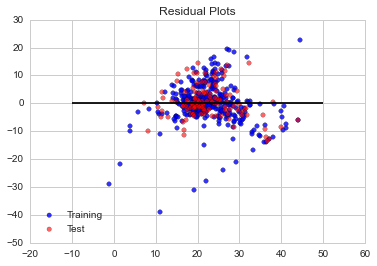

In [27]:
# Scater plot the training data
train = plt.scatter(pred_train, (pred_train - Y_train), c='b', alpha=0.8)

# Scatter plot the testing data
test = plt.scatter(pred_test, (pred_test - Y_test), c='r', alpha=0.6)

# Horizontal line
plt.hlines(y=0, xmin=-10, xmax=50)

#Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

plt.savefig('residualplot.png')

From the plot we can observe that the data is scattered around the horizontal and do not follow any pattern so linear regression can be applied on the data set.